In [1]:
import pandas as pd
import os
from rdkit.Chem import rdBase, RDConfig
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors

In [2]:
# Import data, keep only 310K random molecules
data = pd.read_csv("../exp4/cldr.smi", header = None, sep = ' ', names = ['smiles','zid'])
data = data.sample(n = 320000, random_state = 123)
data.head()

,smiles,zid
3636620,C[NH2+]CC(=O)Nc1ccc(cc1F)Cl,ZINC34979665
8319688,CO[C@H]1CCCC[C@H]1NC(=O)N2CCCC[C@@H]2CN3CCCC3=O,ZINC80485826
6889087,CCc1cc(nc(n1)Nc2c(cccc2F)F)OCC(=O)[O-],ZINC73701994
7405201,C[C@H](C(=O)Nc1cccc(c1)NCc2cc3ccccc3[nH]c2=O)OC,ZINC76867526
8860374,Cc1ccccc1NC(=O)N[C@@](C)(CO)C2CC2,ZINC84868489


In [3]:
n = data.shape[0]
corr_smi_yn = [x != None for x in [Chem.MolFromSmiles(s) for s in data.smiles]]
data = data[corr_smi_yn]
data = data[1:310000]

RDKit ERROR: [11:27:20] Explicit valence for atom # 9 N, 5, is greater than permitted


In [4]:
# Add descriptor columns and use nonisomeric SMILES
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)
data["smi"] = data['mol'].apply(Chem.MolToSmiles, isomericSmiles=False)
data['tpsa'] = data['mol'].apply(Descriptors.TPSA)
data['mr'] = data['mol'].apply(Descriptors.MolMR)
data['lasa'] = data['mol'].apply(Descriptors.LabuteASA)

In [5]:
data[["smi","zid","tpsa","mr","lasa"]].to_csv("./exp5set.csv", index = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26931120d0>,
      dtype=object)

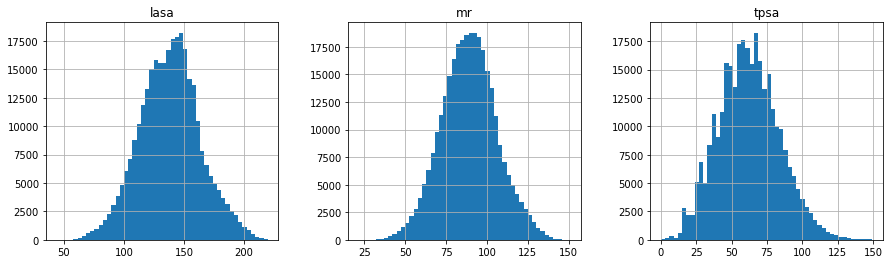

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
data[["tpsa","mr","lasa"]].hist(bins = 50, layout = (1,3), figsize = (15,4))